0.000500000000000056


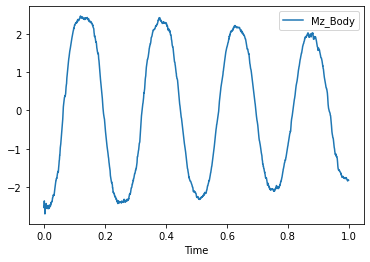

In [2]:
import numpy as np
import pandas as pd
from RBD_m import rigid_body_dynamics
data = pd.read_csv('data.csv', delimiter='\t')
iEuler = [3,2,1]
data.Time = data.Time - data.Time[0]
data.keys()
data.plot('Time','Mz_Body')
print(data.Time[1]-data.Time[0])

In [3]:
from Quaternion_m import euler2quat, qPrint
simRBD = rigid_body_dynamics()
simRBD.att = np.array([data.Pitch[0],data.Yaw[0],data.Roll[0]])
simRBD.omega_body = [data.wx[0], data.wy[0], data.wz[0]]
simRBD.quaterion = euler2quat(Attitude=simRBD.att, iEuler=iEuler)
simRBD.moments_body = np.array([data.Mx_Body[0],data.My_Body[0],data.Mz_Body[0]])
simRBD.Imat = [ [9.170000, 0.000000, 0.00000],
                [0.000000, 5.750000, 0.00000],
                [0.000000, 0.000000, 0.00575]
                ]
simRBD.invImat = np.linalg.inv(simRBD.Imat)

print(simRBD.att)
print(qPrint(simRBD.quaterion))

N = np.size(data.Time)
print(N)
print(np.degrees(simRBD.att))
reconstructed = np.zeros((3,N))
simRBD.dt = 5.E-6
for i,time in enumerate((data.Time)):
    if np.mod(i,N/20) == 0:
        print(f'iteration={i}, time={time:.2e}, att={np.degrees(simRBD.att)}')
    if i > 100000:
        break
    if i > 0:
        simRBD.dt = data.Time[i] - data.Time[i-1]
        simRBD.moments_body = np.array([data.Mx_Body[i],data.My_Body[i],data.Mz_Body[i]])
        simRBD.compute_rotational_dynamics()
    reconstructed[:,i] = simRBD.att[:]

[0.87260928 0.         0.        ]
(0.9063194820154802, 0.0, 0.0, 0.42259318087161757)
2000
[49.99682885  0.          0.        ]
iteration=0, time=0.00e+00, att=[49.99682885  0.          0.        ]
iteration=100, time=5.00e-02, att=[ 1.99766372e+01 -2.33392684e-05  4.08711437e-05]
iteration=200, time=1.00e-01, att=[-3.33197695e+01 -7.66285551e-04  4.58987400e-04]
iteration=300, time=1.50e-01, att=[-4.03969531e+01 -1.60539866e-03  1.12540375e-03]
iteration=400, time=2.00e-01, att=[ 4.98676294e+00 -2.88140964e-03 -4.14665866e-04]
iteration=500, time=2.50e-01, att=[ 4.29213144e+01 -2.98492846e-03 -2.32860766e-03]
iteration=600, time=3.00e-01, att=[ 2.55225421e+01 -5.06929427e-03 -1.12050547e-03]
iteration=700, time=3.50e-01, att=[-2.31748227e+01 -5.20873348e-03  4.04091786e-03]
iteration=800, time=4.00e-01, att=[-3.52334295e+01 -4.94649588e-03  5.91780115e-03]
iteration=900, time=4.50e-01, att=[ 3.34224459e+00 -8.71513886e-03  1.84591531e-03]
iteration=1000, time=5.00e-01, att=[ 3.95286

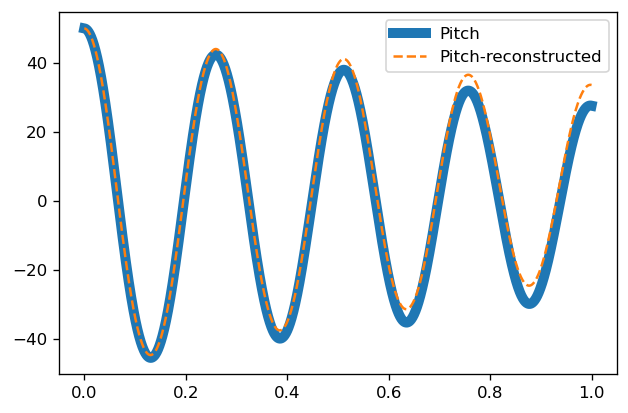

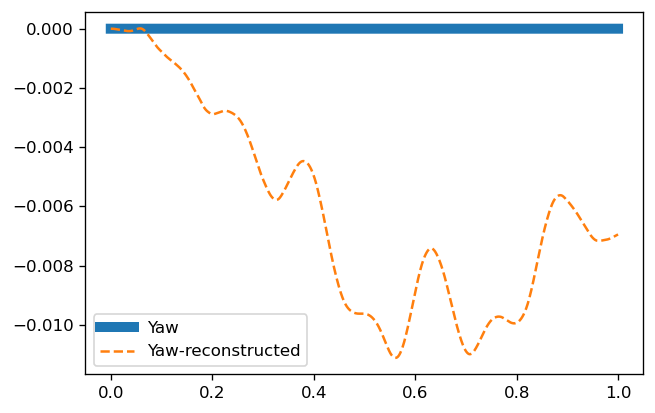

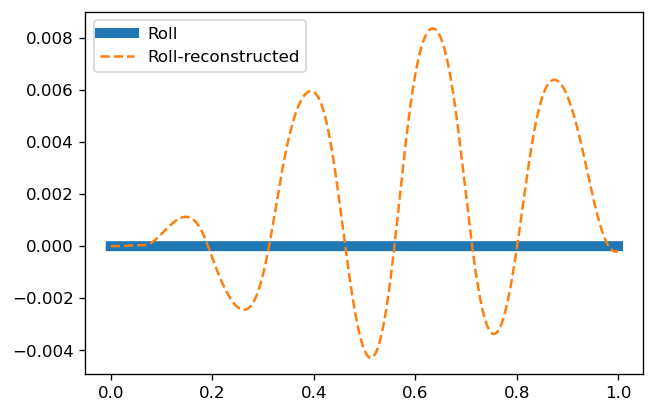

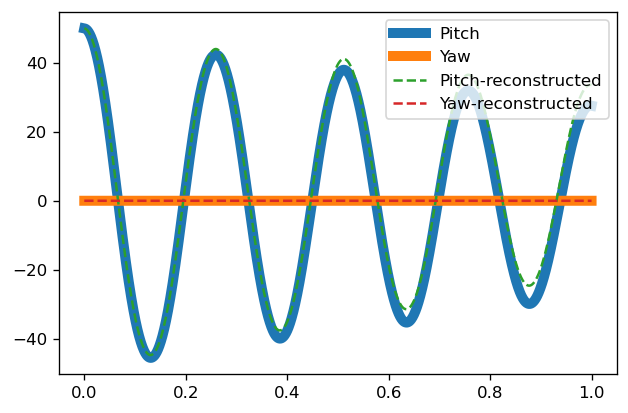

In [4]:
import matplotlib.pyplot as plt
names = ['Pitch', 'Yaw', 'Roll']
for i in range(3):
    plt.figure(dpi=120)
    name = names[i]
    if i == 0:
        plt.plot(data.Time, np.degrees(data.Pitch), linewidth=6,label=name)
    if i == 1:
        plt.plot(data.Time, np.degrees(data.Yaw), linewidth=6,label=name)
    if i == 2:
        plt.plot(data.Time, np.degrees(data.Roll), linewidth=6,label=name)
    plt.plot(data.Time, np.degrees(reconstructed[i,:]), '--',label=f'{name}-reconstructed')
    plt.legend()
    plt.show()
plt.figure(dpi=120)
plt.plot(data.Time, np.degrees(data.Pitch), linewidth=6, label='Pitch')
plt.plot(data.Time, np.degrees(data.Yaw),   linewidth=6, label='Yaw')
plt.plot(data.Time, np.degrees(reconstructed[0,:]), '--', label='Pitch-reconstructed')
plt.plot(data.Time, np.degrees(reconstructed[1,:]), '--', label='Yaw-reconstructed')
plt.legend()
plt.show()